In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from tensorflow.keras import layers
from tensorflow.keras import losses

from sklearn.metrics import accuracy_score, classification_report

print(tf.__version__)

c:\Users\nemethmiklos\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.17.0-dev20240511


In [2]:
# get data files
# !wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
# !wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

In [3]:
# tanuló adathalmaz
train_Dataset = pd.read_csv(train_file_path, sep='\t', header=None)

# oszlopnevek beállítása
train_Dataset.columns = ['label', 'text']

# spam üzenet kapja 0-s értéket, a rendes üzenet az 1-es értéket
elements_of_column = list(train_Dataset['label'])
mapping = {value: index for index, value in enumerate(set(elements_of_column))}
train_Dataset['label'] = train_Dataset['label'].map(mapping)

In [4]:
train_Dataset.tail()

,label,text
4174,1,just woke up. yeesh its late. but i didn't fal...
4175,1,what do u reckon as need 2 arrange transport i...
4176,0,free entry into our £250 weekly competition ju...
4177,0,-pls stop bootydelious (32/f) is inviting you ...
4178,1,tell my bad character which u dnt lik in me. ...


In [5]:
# ellenőrző adathalmaz
test_Dataset = pd.read_csv(test_file_path, sep='\t', header=None)

# oszlopnevek beállítása
test_Dataset.columns = ['label', 'text']

# spam üzenet kapja 0-s értéket, a rendes üzenet az 1-es értéket
elements_of_column = list(test_Dataset['label'])
mapping = {value: index for index, value in enumerate(set(elements_of_column))}
test_Dataset['label'] = test_Dataset['label'].map(mapping)

In [6]:
test_Dataset.head()

,label,text
0,1,i am in hospital da. . i will return home in e...
1,1,"not much, just some textin'. how bout you?"
2,1,i probably won't eat at all today. i think i'm...
3,1,don‘t give a flying monkeys wot they think and...
4,1,who are you seeing?


<Axes: xlabel='label'>

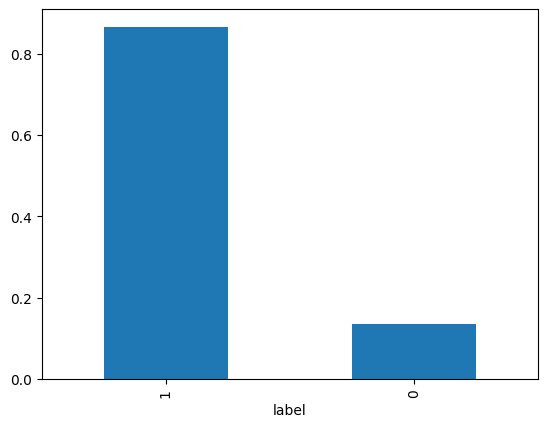

In [7]:
train_Dataset['label'].value_counts(normalize = True).plot.bar()

<Axes: xlabel='label'>

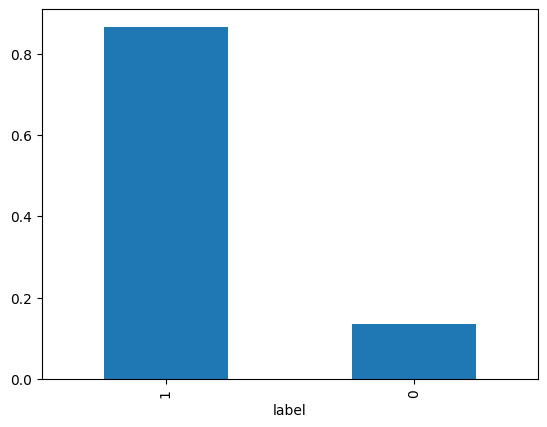

In [8]:
test_Dataset['label'].value_counts(normalize = True).plot.bar()

In [80]:

# szöveg előfeldolgozás mindkét adathalmaz esetén
vectorizer_train_dataset = TfidfVectorizer(max_features=len(test_Dataset))
x_train = vectorizer_train_dataset.fit_transform(train_Dataset["text"])
y_train = train_Dataset["label"]


vectorizer_test_dataset = TfidfVectorizer(max_features=len(test_Dataset))
x_test = vectorizer_test_dataset.fit_transform(test_Dataset["text"])
y_test = test_Dataset["label"]

<bound method NDFrame.sample of 0       1
1       1
2       1
3       1
4       1
       ..
1387    1
1388    1
1389    1
1390    0
1391    0
Name: label, Length: 1392, dtype: int64>


In [54]:
# modell létrehozása és tanítása
model = LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

In [84]:
test_model = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, test_model))
print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')
print(classification_report(y_test, test_model))
print(test_model.shape)

Accuracy: 0.8642241379310345

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       187
           1       0.87      1.00      0.93      1205

    accuracy                           0.86      1392
   macro avg       0.43      0.50      0.46      1392
weighted avg       0.75      0.86      0.80      1392

(1392,)


In [114]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
    pred_vector = vectorizer_train_dataset.transform([pred_text])

    # előrejelzés a betanított modell alapján
    prediction_model = model.predict(pred_vector)
    report = accuracy_score([y_test[0]], prediction_model)
    print(report)
    if prediction_model == 0:
        return [report, 'spam']
    else:
        return [report, 'ham']


pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1.0
[1.0, 'ham']


In [115]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1.0
0.0
1.0
0.0
0.0
1.0
1.0
You passed the challenge. Great job!
